In [2]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import LSTM
from keras.layers import Conv1D, MaxPooling1D
from keras.datasets import imdb

import numpy
import tensorflow as tf
import matplotlib.pyplot as plt

seed = 0
numpy.random.seed(seed)
tf.random.set_seed(3)

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=5000)

x_train = sequence.pad_sequences(x_train, maxlen=100)
x_test = sequence.pad_sequences(x_test, maxlen=100)

model = Sequential()
model.add(Embedding(5000,100))
model.add(Dropout(0.5))
model.add(Conv1D(64, 5, padding = 'valid', activation = 'relu', strides = 1))
model.add(MaxPooling1D(pool_size = 4))
model.add(LSTM(55))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 100)         500000    
_________________________________________________________________
dropout_1 (Dropout)          (None, None, 100)         0         
_________________________________________________________________
conv1d (Conv1D)              (None, None, 64)          32064     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, None, 64)          0         
_________________________________________________________________
lstm (LSTM)                  (None, 55)                26400     
_________________________________________________________________
dense (Dense)                (None, 1)                 56        
_________________________________________________________________
activation (Activation)      (None, 1)                

Epoch 1/5
250/250 [==============================] - 38s 154ms/step - loss: 0.4485 - accuracy: 0.7738 - val_loss: 0.3675 - val_accuracy: 0.8377
Epoch 2/5
250/250 [==============================] - 38s 152ms/step - loss: 0.2959 - accuracy: 0.8756 - val_loss: 0.3337 - val_accuracy: 0.8556
Epoch 3/5
250/250 [==============================] - 42s 168ms/step - loss: 0.2537 - accuracy: 0.8945 - val_loss: 0.3248 - val_accuracy: 0.8595
Epoch 4/5
250/250 [==============================] - 39s 154ms/step - loss: 0.2162 - accuracy: 0.9149 - val_loss: 0.3292 - val_accuracy: 0.8549
Epoch 5/5
782/782 [==============================] - 10s 13ms/step - loss: 0.3502 - accuracy: 0.8546

 Test Accuracy: 0.8546


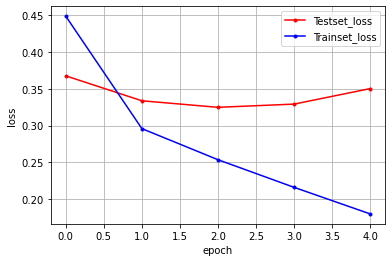

In [3]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, batch_size=100, epochs=5, validation_data=(x_test, y_test))

print("\n Test Accuracy: %.4f" % (model.evaluate(x_test, y_test)[1]))

y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()